# Let's Start...

## Import the necessary packages

In [1]:
import numpy as np # for mathemetical functions
import pandas as pd # for file management
import matplotlib.pyplot as plt # plotting the data 
import seaborn as sns # Nicely plotting the data ;)

In [2]:
import nltk # Basic NLP tasks
import tensorflow as tf # To apply Neural Network

In [3]:
data = pd.read_csv(r"/home/nisarg/Downloads/Twitter_Data.csv") # Import Data File

## Exploring the data

In [4]:
data.head() # 

,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162972 entries, 0 to 162971
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162972 non-null  object
 1   category    162972 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


## Here we can see there are some NaN values in the data.
## But if you look at the file carefully there is no missing data but there is indentation problems, So I have cleaned the data manually. 

## Now let's see how the data is using Matplotlib.

(array([35510.,     0.,     0.,     0.,     0., 55212.,     0.,     0.,
            0., 72250.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

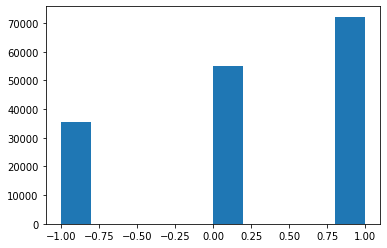

In [6]:
plt.hist(data['category'])

In [7]:
print(data['clean_text'][data['category'].isna()]) # "Clean_Text" when "category" is NaN.

Series([], Name: clean_text, dtype: object)


In [8]:
print(data['category'][data['clean_text'].isna()]) # "category" when "Clean_Text" is NaN.

Series([], Name: category, dtype: int64)


# There is no NAN value, the data has misplaced number.

In [9]:
X = data['clean_text']
X.reset_index()
y = data['category']
y.reset_index()

,index,category
0,0,-1
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
162967,162967,-1
162968,162968,-1
162969,162969,0
162970,162970,0


## Split the data into Training and Test Data, and split into X and y.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% --> Training Data, 20% --> Testing Data

(array([28420.,     0.,     0.,     0.,     0., 44190.,     0.,     0.,
            0., 57767.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

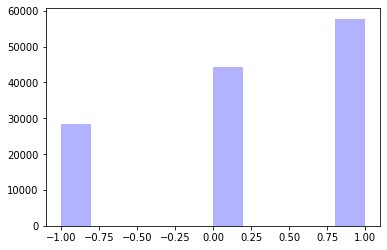

In [11]:
plt.hist(y_train, color = 'blue', alpha = 0.3) # Visuallisation of y_train

(array([ 7090.,     0.,     0.,     0.,     0., 11022.,     0.,     0.,
            0., 14483.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

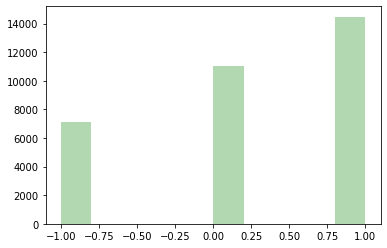

In [12]:
plt.hist(y_test, color = 'green', alpha = 0.3) # Visuallisation of y_test

In [14]:
tf.__version__

'2.4.0'

In [15]:
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
voc_size = 5000 # Setting Vocabulary Size.

In [17]:
import re # Regular Expression
import nltk # Natural Language Tool Kit

In [18]:
from nltk.stem import PorterStemmer # Stemmer performs Stemming and reduce the word size for tokenization.
from nltk.corpus import stopwords # Stopwords are the words that are not necessary for certain NLP tasks.
ps = PorterStemmer()
corpus = []
# preparing the corpus by reducing the sentence using PorterStemmer, removing stopwords.
for i in (X_train):
    review = i
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
corpus_test = []
for i in (X_test):
    review = i
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus_test.append(review)

In [20]:
corpus

['great achiev congratul scientist govt modi take kind decis',
 'modi address public meet kurnool andhra pradesh watch live via namo app',
 'one buddhupappu born jun 1970 throne presid anti nationalist parti dec 2017 bafoon scientist conceiv idea wtf dont modi said need ball take challeng ass ched',
 'pray modi success way big deal surviv bhutto daughter soninlaw nawaz famili etc',
 'apna dukh sambhal rakho modi aan bad aur kam jayega educ happi whatev learn rais burn issu modi year ask around mudda apn aap samaj jayega',
 'modi support common voic even pakistan support voic',
 'modi address public meet gohpur assam dial 9345014501 listen live',
 'chang modi rahul gandhi sonia gandhi speech get congressi leader speech',
 'modi teach kid win violat rule resort even modi design asat shudnt address model code conduct chowkidar rafael mein chori kark darr gaya hai henc use drdo cover shame',
 'drdo chief prais modi exisro chief say upa disast congress spokesperson err neutral journalist co

In [21]:
corpus_test

['cant work like modi yogi next',
 'per modi kept digniti protest stop write',
 'modi take pok back',
 'actual mmj allow contest cut vote modi candid win',
 'delhi prime minist narendra modi speak bjp main bhi chowkidar campaign talkatora stadium watch',
 'modi clarifi countri need self defenc liber pseudo intellectu indian origin would best explet paint ”nyt” “bbc”about weaponis india modi akin kim jong seri special elect time',
 'make chowkidaar campaign key part overal messag clearli \\ convinc main bhi chowkidaar theme work via',
 'modi done noth nation past four year save ridicul opposit abas manner possibl forget prime ministeri duti campaign parti state elect month communalis countri',
 'dont sorrow farmer suicid vote modi want dead bodi soldier use polit gain definit vote modi',
 'congress croni please stop take credit entir credit goe modi govern scientist first congress misrul year gandhi fill pocket leftov went king corrupt',
 'elect commis give permiss modi speech',
 'good 

In [22]:
X_train

66956     great achievement and congratulations our scie...
110056    modi addresses public meeting kurnool andhra p...
64039     one buddhupappu was born jun 1970 was throned ...
79604     then pray for modis success the way its not bi...
59915     apna dukh sambhal rakho modi aane bad aur kam ...
                                ...                        
119879    will buy mallyas kingfisher nirav modi choksi ...
103694                                    all the way modi 
131932    indians are getting cosy the idea voting rahul...
146867    wow reading comments here like watching circus...
121958    you are wrong love modi wont mind hearing his ...
Name: clean_text, Length: 130377, dtype: object

In [23]:
y_train

66956     1
110056    1
64039    -1
79604     1
59915     1
         ..
119879    0
103694    0
131932    1
146867    1
121958    1
Name: category, Length: 130377, dtype: int64

## Converting strings to OneHot representation.

In [24]:
one_hot_repr = [one_hot(words, voc_size) for words in corpus]
sent_len = 50 #sentence length = 50
embedded_docs = pad_sequences(one_hot_repr, padding = 'pre', maxlen= sent_len)

In [25]:
one_hot_repr_test = [one_hot(words, voc_size) for words in corpus_test]
sent_len = 50
embedded_docs_test = pad_sequences(one_hot_repr_test, padding = 'pre', maxlen= sent_len)

# Modeling the Neural Network

In [26]:
embedded_vector_feature = 40
model = Sequential()
model.add(Embedding(voc_size, embedded_vector_feature, input_length=sent_len))
model.add(LSTM(100))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 256,703
Trainable params: 256,703
Non-trainable params: 0
_________________________________________________________________


In [27]:
X_train = embedded_docs
y_train = pd.get_dummies(y_train)

In [28]:
X_test = embedded_docs_test
y_test = pd.get_dummies(y_test)

In [29]:
y_test

,-1,0,1
161512,0,1,0
95056,0,1,0
5215,0,1,0
33604,0,0,1
155299,0,0,1
...,...,...,...
95371,0,0,1
90726,1,0,0
87374,0,0,1
108362,0,1,0


# Fit the model

In [30]:
model.fit(X_train, y_train, epochs = 10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
2038/2038 [==============================] - 167s 81ms/step - loss: 0.7281 - accuracy: 0.6875 - val_loss: 0.5655 - val_accuracy: 0.7735
Epoch 2/10
2038/2038 [==============================] - 62s 31ms/step - loss: 0.5337 - accuracy: 0.7900 - val_loss: 0.5625 - val_accuracy: 0.7780
Epoch 3/10
2038/2038 [==============================] - 1256s 617ms/step - loss: 0.5053 - accuracy: 0.7996 - val_loss: 0.5511 - val_accuracy: 0.7830
Epoch 4/10
2038/2038 [==============================] - 59s 29ms/step - loss: 0.4691 - accuracy: 0.8131 - val_loss: 0.5632 - val_accuracy: 0.7803
Epoch 5/10
2038/2038 [==============================] - 57s 28ms/step - loss: 0.4449 - accuracy: 0.8245 - val_loss: 0.5734 - val_accuracy: 0.7795
Epoch 6/10
2038/2038 [==============================] - 57s 28ms/step - loss: 0.4137 - accuracy: 0.8377 - val_loss: 0.5894 - val_accuracy: 0.7751
Epoch 7/10
2038/2038 [==============================] - 57s 28ms/step - loss: 0.3868 - accuracy: 0.8494 - val_loss: 0.62

# Here we can see the network has achieved around 77% Accuracy on Validation Data.